# [Prompt란?](https://codingsmu.tistory.com/162)

- ChatGPT를 사용해 과제나 리포트 작성을 할 때, 원하는 방향으로 답변이 나오도록 여러가지 입력을 준 경험이 한 번씩 있다면, "프롬프트(Prompt)를 잘 줘야 ChatGPT가 대답을 잘해줘"라는 말을 들은 경험도 있을 것입니다.
- 즉, 프롬프트(Prompt)란 ChatGPT 모델이 사용자가 원하는 답변을 내뱉기 위해 주는 적절한 입력값입니다.

이러한 프롬프트(Prompt)를 사용해서 모델의 추론/학습에 관여하는 `프롬프트 엔지니어링(Prompt Engineering)`, `프롬프트 튜닝(Prompt Tuning)` 등이 활발히 연구되고 있습니다.

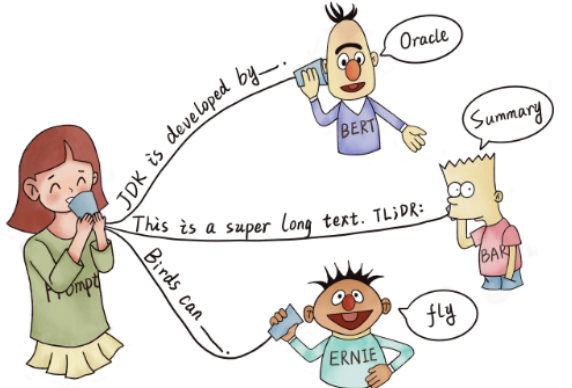

## 프롬프트의 형태에 따른 학습 방법

- 프롬프트는 크게 Hard Prompt와 Soft Prompt로 나눌 수 있습니다.
- Hard Prompt는 자연어 형태의 이산적인(Discrete) 값을 가지며, Soft Prompt는 실수(혹은 실수 값으로 구성된 벡터)로 이루어진 연속적인(Continuous) 값을 가집니다.
- 언어모델은 이산적인 값이 아닌 연속적인 값으로 학습되기 때문에 Hard Prompt는 최적화되지 않은 단점이 있습니다.
- 반면, Soft Prompt는 input 앞에 튜닝(연속적이고, 조정이 가능한)이 가능한 임베딩 조각(tunable piece of embedding)이 붙게 됩니다. 이 임베딩 조각은 실수(Real Number)로 이루어진 연속적인(Continuous) 값으로 학습되고, 기존의 Hear Prompt 학습에 비해 더 효과적인 학습이 가능합니다.

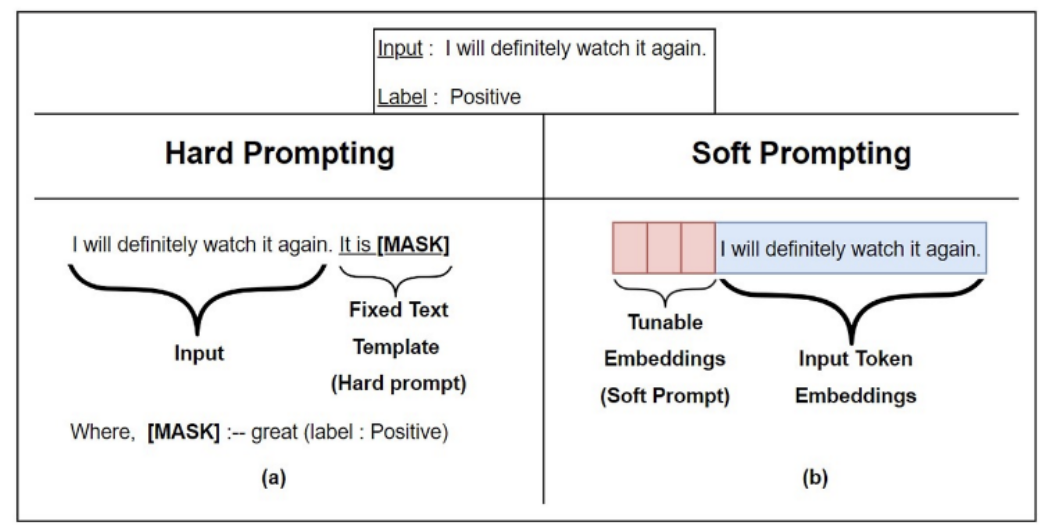

### [Prompt-Based Learning](https://codingsmu.tistory.com/153)

- 모델에 들어가는 입력 데이터(input data)를 사람이 읽을 수 있는 설명(human readable instructions)으로 잘 작성된 텍스트와 연결하여 수정하게 되는데, 이때 만들어지는 텍스트를 프롬프트(prompt)라고 합니다.
- 프롬프트는 task-specific하게 훈련되지 않아도 사전학습 언어모델(PLM, Pre-trained Language Model)이 새로운 테스크(e.g. 질의응답, 기계번역 등)에 대해서 잘 수행되도록 합니다.
- 즉, 단지 자연어로 모델이 어떤 일을 수행해야 할지 알려주는 것만으로도 별도의 추가훈련 없이 새로운 테스크를 좋은 성능으로 수행할 수 있습니다.

따라서 Prompt-based learning 목적은 프롬프트의 도움을 받아 사전학습된 지식을 최대한 활용하자입니다.

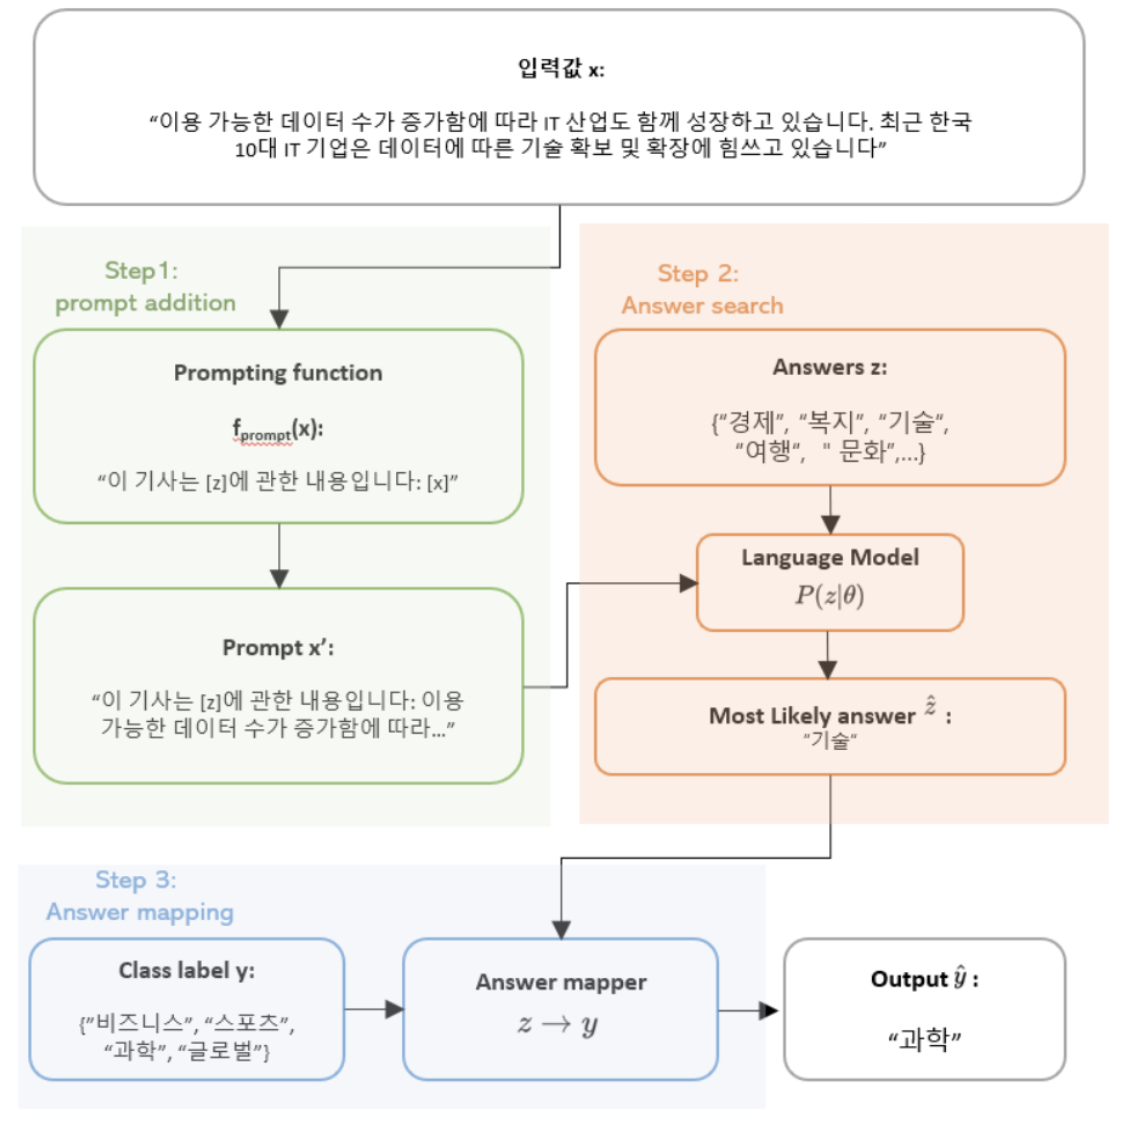

### Prompt Based Learning의 필요성

NLP의 이전 패러다임은 "Pre-train, Fine-tune"이었습니다. 언어모델을 사전학습(pre-train)하고 다운스트림 테스크를 위해 추가 학습데이터를 사용하여 파인튜닝(fine-tune)을 거쳤습니다.
- 자연어처리와 딥러닝 분야의 전문가들은 "어떻게 우리는 언어모델을 파인튜닝할까?"라는 질문에 초점을 맞춰왔습니다.
- 파인튜닝은 레이블링된 데이터가 필요한 supervised task로 데이터를 직접 구축 시에는 많은 비용이 들고 무료로 이용한 데이터는 한정적입니다.

Prompt Based Learning은 다음의 질문에 초점을 맞춥니다.
- 어떻게 언어모델의 입력값을 디자인해야하는가?
- 이에 대한 답변은 추가적인 파인튜닝 없이 사전학습모델이 새로운 테스크를 수행할 수 있도록 하는 것입니다.
- 즉 이방법은 레이블링 데이터가 추가적으로 더 필요한 상황을 막는 것입니다.

파인튜닝 없이 언어모델을 사용할 때 이를 `Zero-/Few-shot learning`이라고 합니다.
- 이는 prediction을 위해 사용되는 추가 학습데이터가 매우 적거나(few), 아예 필요하지 않기(zero) 때문입니다.
- T5(Text-to-Text transfer Transformer)와 같은 파인튜닝된 작은 모델이 더 큰 few-shot 모델인 GPT-3를 SuperGLUE와 같은 NLP 벤치마크를 넘어서는 모습을 보입니다.
- 하지만 추가 데이터의 필요성을 제거하는 것은 많은 응용환경에서 Prompt-based learning을 선호하게 만들 수 있는 장점입니다.

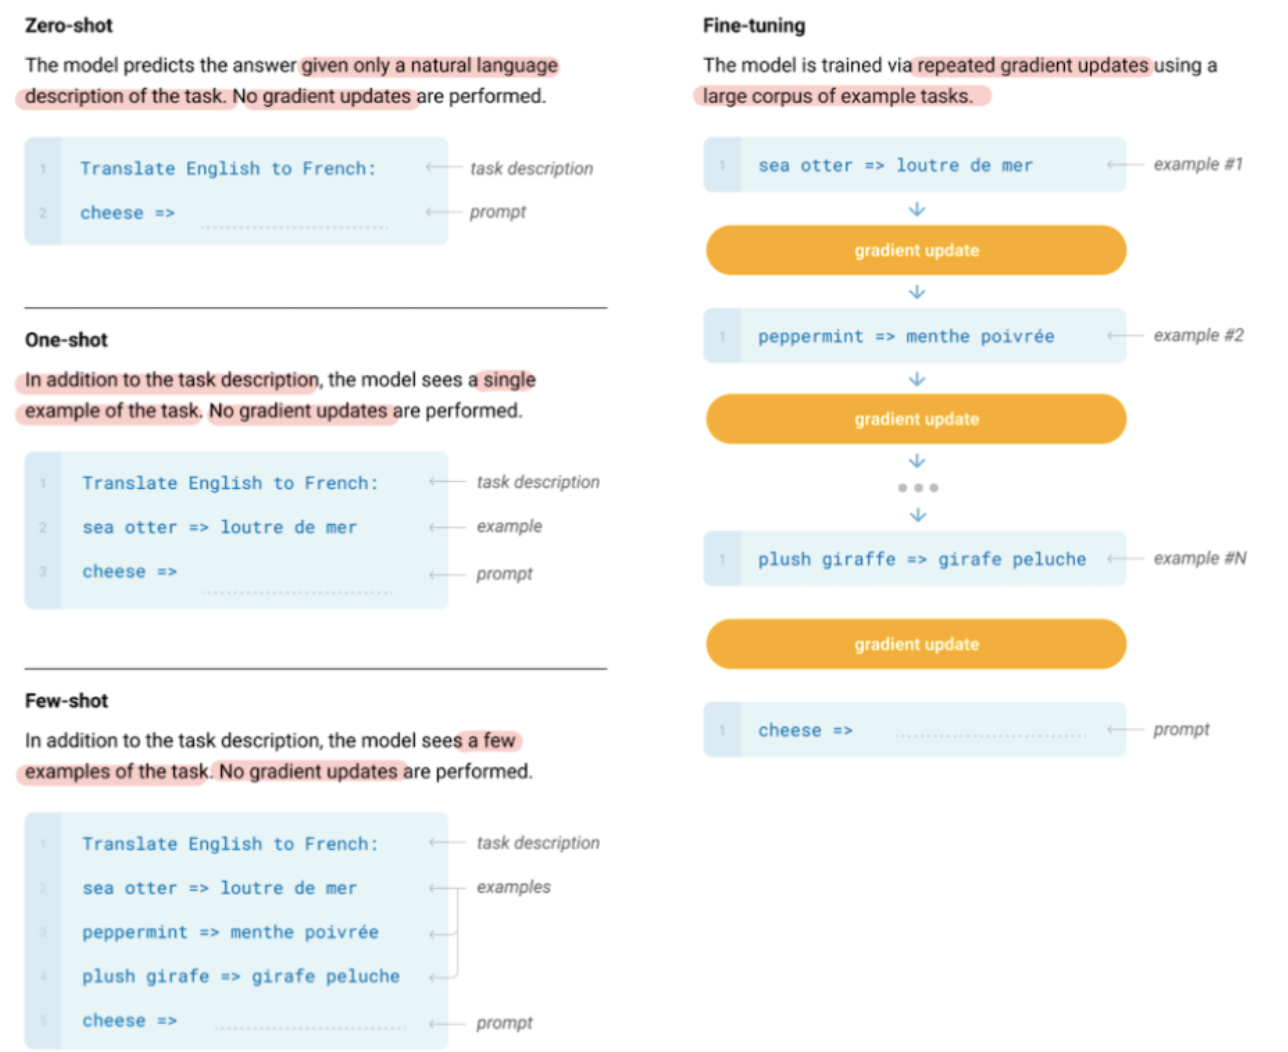

### Soft Prompt + Frozen Pre-trained Model
> 대표적인 연구로는 `Prompt Tuning`과 `Prefix Tuning`이 있습니다.
> 두 논문 모두 Soft Prompt를 이용해 기존의 파인튜닝 대비 효과적인 학습이 가능하다는 점을 주요 포인트로 하고 있습니다.

- Prompt Tuning(그림 A)
  - 사전학습모델(Pre-trained Model)을 이용하여 A, B, C 테스크를 수행한다고 할 때, 기존의 Model Tuning 방법과 제안 방법인 Prompt Tuning을 비교해서 보여주고 있습니다.
  - 기존 방법의 경우 세 가지 테스크를 수행하기 위해 사전학습 모델 전체의 task-specific한 카피 본을 테스크 개수 만큼 만들고, 추론 역시 개별 batch에서 수행해야하는 문제점이 있습니다.
- Prefix Tuning(그림 B)
  - 다양한 테스크를 수행한다고 할 때 기존 Fine-tuning 방법은 각 테스크마다 모델 전체 파라미터를 업데이트 해야한다는 문제점을 이야기하고 있습니다.

두 논문에서는 학습 가능한 Soft Prompt를 이용하여 테스크마다 개별로 모델 전체 파라미터를 업데이트 할 필요없이 프롬프트만 업데이트하여 효율적인 학습을 가능하게 했습니다.

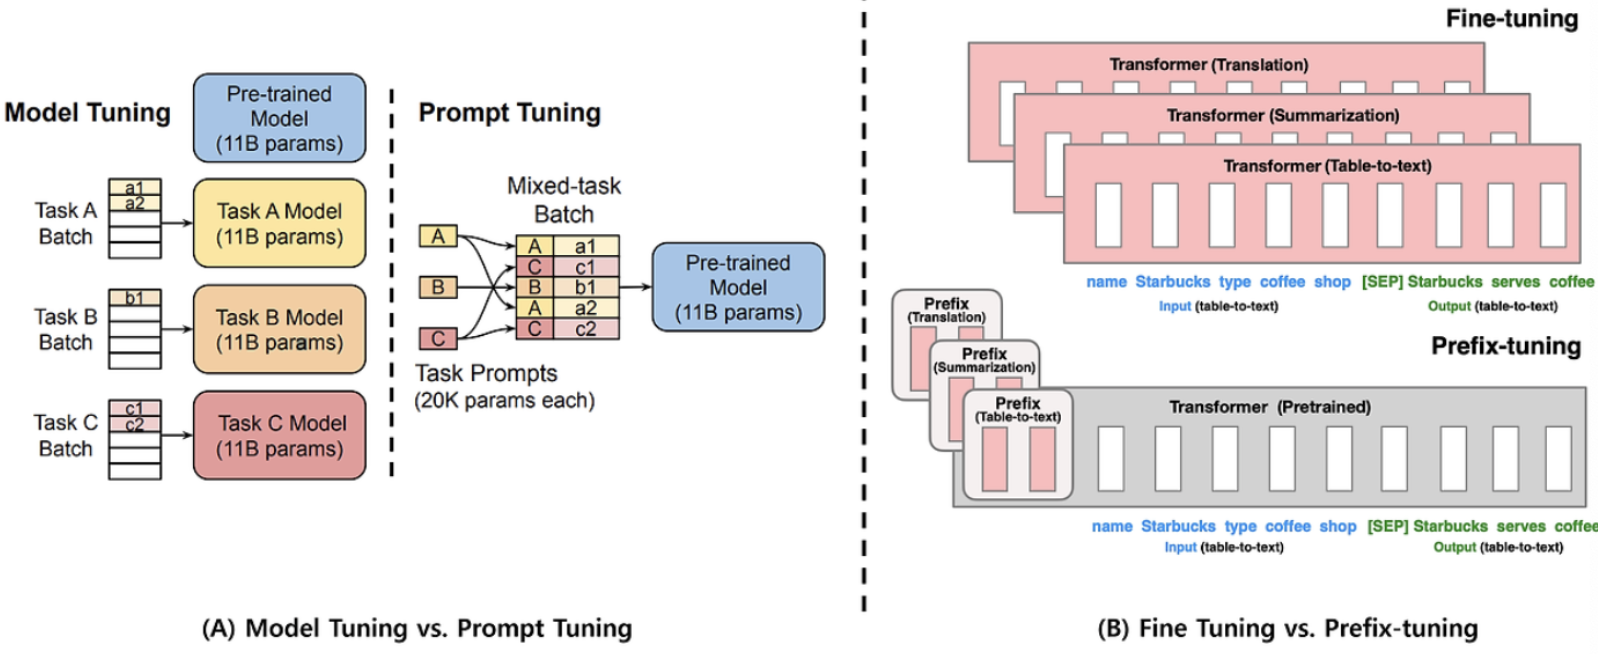

# [Prompt Engineering](https://moon-walker.medium.com/the-art-of-prompt-engneering-1-prompt-engineering%EC%9D%B4%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80-4a7a88ce67c)
- 프롬프트 엔지니어링의 주요 목표는 사용자의 의도와 원하는 결과를 전달하는 프롬프트를 만들어 모델의 성능, 정확성, 유용성을 극대화하는 것이다.
- 프롬프트 엔지니어링이 필요한 이유는 현재 LLM의 동작 방식의 한계와 인간과 컴퓨터의 상호 작용을 위해 자연어를 사용하고 있기 때문이다.

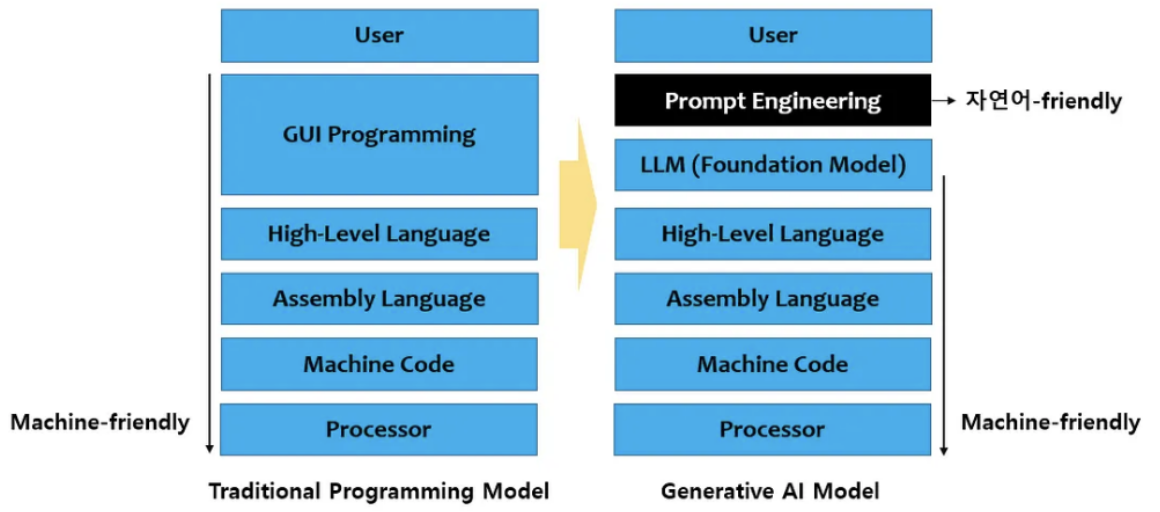

## 프롬프트 엔지니어링과 프롬프트 튜닝의 장단점
- 프롬프트 엔지니어링
  - 장점: 프롬프트 엔지니어링은 출력을 더 많이 제어할 수 있기 때문에 프롬프트 튜닝보다 좀더 효과적이다.
  - 단점: 프롬프트 엔지니어링은 사람의 입력이 더 많이 필요하기 때문에 프롬프트 튜닝보다 더 많은 시간이 소요된다.
- 프롬프트 튜닝
  - 장점: 프롬프트 튜닝은 더 자동화되어 있기 때문에 프롬프트 엔지니어링보다 빠르고 쉽다.
  - 단점: 프롬프트 튜닝은 출력에 대한 많은 제어를 허용하지 않기 때문에 프롬프트 엔지니어링보다 덜 효과적이다.

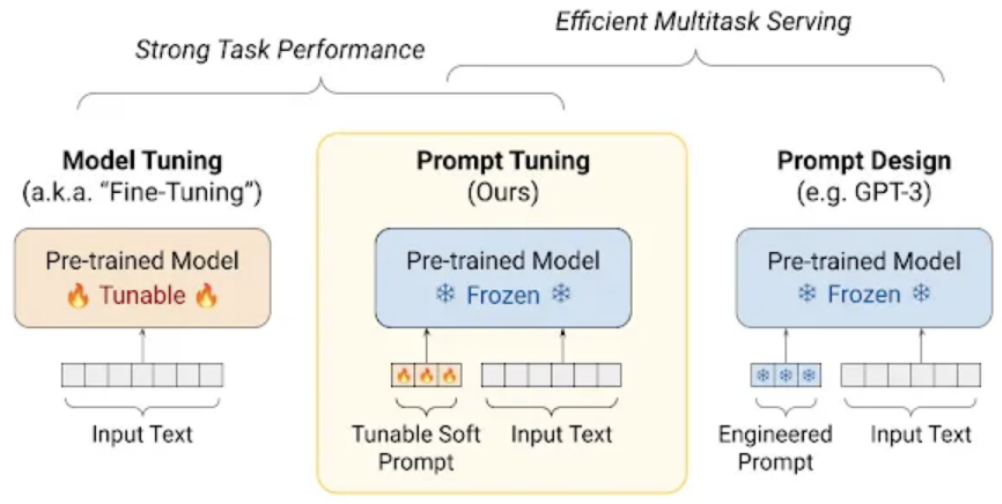

# Parameter-Efficient Fine-Tuning(PEFT) 소개

### 전통적인 Fine-Tuning의 문제점

기존의 **전체 모델 Fine-Tuning**은 다음과 같은 문제가 있습니다:

- **메모리 부족**: 대형 모델(7B, 13B 파라미터)의 모든 파라미터를 업데이트하려면 엄청난 GPU 메모리가 필요
- **저장 공간**: 각 태스크마다 전체 모델을 별도로 저장해야 함
- **학습 시간**: 모든 파라미터를 업데이트하므로 학습이 오래 걸림
- **비용**: 높은 하드웨어 요구사항으로 인한 높은 비용

### PEFT의 해결책

**Parameter-Efficient Fine-Tuning(PEFT)**는 이러한 문제를 해결합니다:

- **적은 파라미터만 학습**: 전체 모델의 1% 미만만 업데이트
- **메모리 효율성**: 기존 대비 훨씬 적은 GPU 메모리 사용
- **빠른 학습**: 적은 파라미터로 인한 빠른 학습 속도
- **저장 효율성**: 작은 크기의 어댑터만 저장하면 됨

### PEFT의 주요 방법들

1. **LoRA (Low-Rank Adaptation)**: 행렬 분해를 통한 효율적 학습
2. **Prefix Tuning**: 입력 앞에 학습 가능한 prefix 추가
3. **Prompt Tuning**: 임베딩 레벨에서 가상 토큰 추가
4. **AdaLoRA**: 적응적 LoRA
5. **IA3**: Infused Adapter by Inhibiting and Amplifying Inner Activations


## 1. Prefix Tuning 이해하기

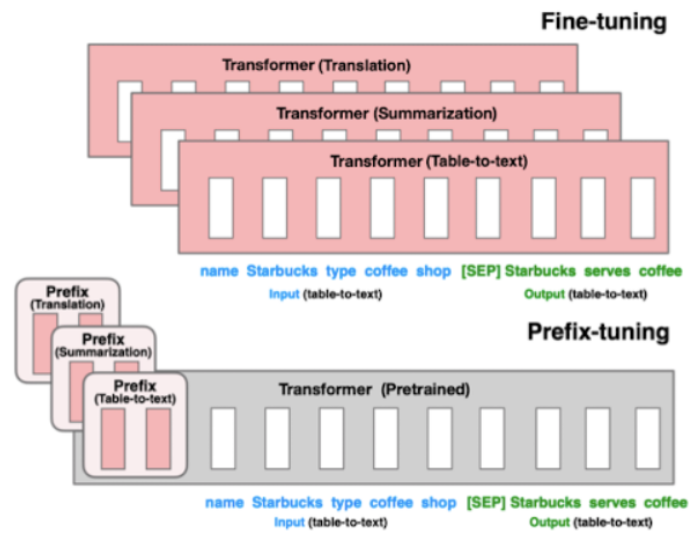

### PrefixTuningConfig란?

**PrefixTuningConfig**는 Prefix Tuning 방법을 설정하는 클래스입니다. 입력 시퀀스 앞에 **학습 가능한 연속적인 prefix**를 추가하는 방법입니다.

### 핵심 아이디어

```
일반적인 입력: [입력 토큰들]
Prefix Tuning: [학습가능한 prefix] + [입력 토큰들]
```

### 왜 PrefixTuningConfig가 필요한가?

#### 1. 메모리 효율성
- 전체 모델: 7.8B 파라미터 (약 15GB)
- Prefix Tuning: 약 1M 파라미터 (약 4MB)
- **99.9% 메모리 절약**

#### 2. 멀티태스크 지원
```python
# 하나의 기본 모델 + 여러 prefix
기본_모델 + 번역_prefix = 번역 모델
기본_모델 + 요약_prefix = 요약 모델
기본_모델 + QA_prefix = QA 모델
```

#### 3. 빠른 학습과 배포
- 작은 prefix만 학습하므로 빠름
- prefix 파일만 교체하면 즉시 태스크 변경 가능

### PrefixTuningConfig 주요 파라미터

- `task_type`: 태스크 유형 (CAUSAL_LM 등)
- `num_virtual_tokens`: 가상 토큰 개수
- `token_dim`: 토큰 차원 크기
- `num_transformer_submodules`: 트랜스포머 서브모듈 수
- `num_attention_heads`: 어텐션 헤드 수
- `num_layers`: 레이어 수


## 2. Prompt Tuning 이해하기

### Model Tuning
- 기존 모델 튜닝 방식은 각각의 task에 맞게 pre-trained 된 모델들을 모두 fine-tuning하는 방식이었음.

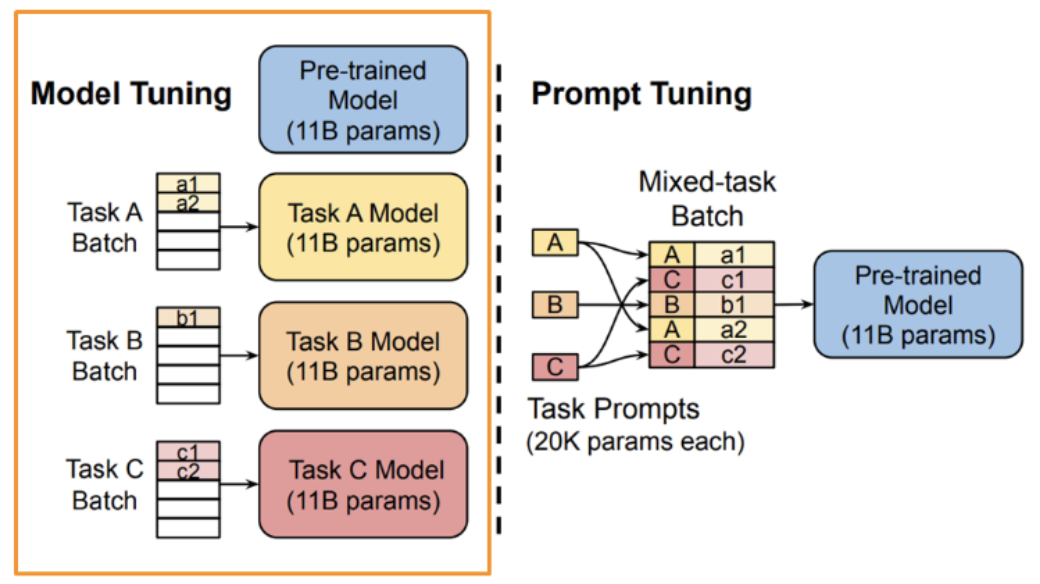

### Prompt Tuning
- input text 의 앞부분에 추가된 additional k 토큰들만 downstream 태스크에서 학습함.
- 각 태스크마다 prompt 들을 저장하여 인퍼런스에서 mixed-task 로 사용.
- GPT3 의 prompt와 달리 기존 트랜스포머 모델 파라미터는 froze 해놓고, prompt 파라미터 update 할 수 있음.

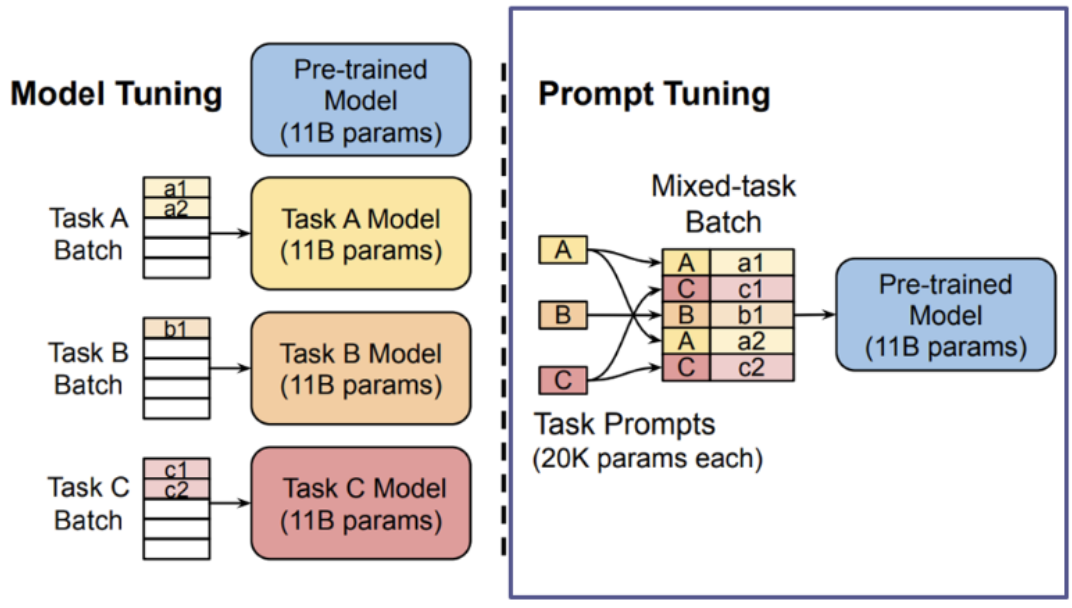

### Prefix Tuning vs Prompt Tuning

| 구분 | Prefix Tuning | Prompt Tuning |
|------|---------------|---------------|
| **적용 위치** | 모든 Transformer 레이어 | 입력 임베딩 레이어만 |
| **파라미터 수** | 더 많음 (레이어별 prefix) | 더 적음 (임베딩만) |
| **성능** | 일반적으로 더 높음 | 적지만 효율적 |
| **메모리** | 상대적으로 더 사용 | 매우 적게 사용 |

### PromptTuningConfig란?

**PromptTuningConfig**는 입력 임베딩 레벨에서 **학습 가능한 가상 토큰(soft prompt)**을 추가하는 방법을 설정하는 클래스입니다.


### 핵심 아이디어

```
일반적인 입력: [토큰1, 토큰2, 토큰3, ...]
Prompt Tuning: [가상토큰1, 가상토큰2, ..., 가상토큰k] + [토큰1, 토큰2, 토큰3, ...]
```

### 왜 PromptTuningConfig가 필요한가?

#### 1. 극도의 효율성
- **최소한의 파라미터**: 보통 100~500개의 가상 토큰만 사용
- **최소한의 메모리**: 몇 KB 수준의 추가 메모리만 필요
- **빠른 학습**: 매우 적은 파라미터로 인한 초고속 학습

#### 2. 자연스러운 프롬프트 방식
```python
# 전통적인 하드 프롬프트
"다음 문장을 한국어로 번역하세요: Hello world"

# Prompt Tuning의 소프트 프롬프트
[학습된_가상토큰들] + "Hello world"
```

#### 3. 모델 크기별 효과
- **작은 모델 (< 1B)**: 효과가 제한적
- **중간 모델 (1B~10B)**: 좋은 성능
- **대형 모델 (> 10B)**: 전체 fine-tuning과 비슷한 성능

### PromptTuningConfig 주요 파라미터

- `task_type`: 태스크 유형
- `prompt_tuning_init`: 초기화 방법 (TEXT, RANDOM 등)
- `num_virtual_tokens`: 가상 토큰 개수
- `prompt_tuning_init_text`: 초기화에 사용할 텍스트
- `tokenizer_name_or_path`: 토크나이저 경로


# 실습: EXAONE 모델로 PrefixTuningConfig와 PromptTuningConfig 예제

이제 EXAONE-3.5-7.8B-Instruct 모델을 사용하여 실제로 두 방법을 구현해보겠습니다.


## 1. 필요한 라이브러리 설치

In [1]:
%pip install -q transformers datasets peft accelerate torch bitsandbytes


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 2. 필요한 라이브러리 임포트

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PrefixTuningConfig, PromptTuningConfig, PromptTuningInit, TaskType, get_peft_model
from datasets import Dataset

print("라이브러리 임포트 완료!")
print(f"PyTorch 버전: {torch.__version__}")
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")


라이브러리 임포트 완료!
PyTorch 버전: 2.8.0.dev20250319+cu128
CUDA 사용 가능: True


## 3. EXAONE 모델과 토크나이저 로드

### 4bit 양자화 설정 (메모리 절약)

In [3]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

### 모델 로드

In [75]:
# model_name = "LGAI-EXAONE/EXAONE-3.5-7.8B-Instruct"
model_name = "LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct"
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto",
    torch_dtype=torch.float16,
    trust_remote_code=True
)

model.config.use_cache = False

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [76]:
print(f"모델 크기: {sum(p.numel() for p in model.parameters())/1e9:.1f}B 파라미터")

모델 크기: 1.3B 파라미터


### 토크나이저 로드

In [77]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

## 4. PrefixTuningConfig 설정

In [102]:
prefix_config = PrefixTuningConfig(
    task_type=TaskType.CAUSAL_LM,        # 인과적 언어 모델링 태스크
    inference_mode=False,                # 학습 모드
    num_virtual_tokens=30,               # 가상 토큰 개수
)

print("PrefixTuningConfig 설정 완료!")
print(f"설정 내용:")
print(f"   - 태스크 타입: {prefix_config.task_type}")
print(f"   - 가상 토큰 수: {prefix_config.num_virtual_tokens}")


PrefixTuningConfig 설정 완료!
설정 내용:
   - 태스크 타입: TaskType.CAUSAL_LM
   - 가상 토큰 수: 30


## 5. PromptTuningConfig 설정

In [79]:
prompt_config = PromptTuningConfig(
    task_type=TaskType.CAUSAL_LM,                    # 인과적 언어 모델링 태스크
    prompt_tuning_init=PromptTuningInit.TEXT,        # 텍스트로 초기화
    num_virtual_tokens=20,                           # 가상 토큰 개수 (Prefix보다 적게)
    prompt_tuning_init_text="한국어로 정확하고 친절하게 답변하세요",  # 초기화 텍스트
    tokenizer_name_or_path=model_name,               # 토크나이저 경로
)

print("PromptTuningConfig 설정 완료!")
print(f"설정 내용:")
print(f"   - 태스크 타입: {prompt_config.task_type}")
print(f"   - 가상 토큰 수: {prompt_config.num_virtual_tokens}")
print(f"   - 초기화 방법: {prompt_config.prompt_tuning_init}")
print(f"   - 초기화 텍스트: {prompt_config.prompt_tuning_init_text}")


PromptTuningConfig 설정 완료!
설정 내용:
   - 태스크 타입: TaskType.CAUSAL_LM
   - 가상 토큰 수: 20
   - 초기화 방법: PromptTuningInit.TEXT
   - 초기화 텍스트: 한국어로 정확하고 친절하게 답변하세요


## 6. 파라미터 수 비교: Prefix vs Prompt

In [80]:
prefix_params = 30 * 4096 * 2 * 32  # num_virtual_tokens * token_dim * submodules * layers
prompt_params = 20 * 4096           # num_virtual_tokens * token_dim

print(f"\n파라미터 수 비교:")
print(f"   - Prefix Tuning: {prefix_params:,} 파라미터")
print(f"   - Prompt Tuning: {prompt_params:,} 파라미터")
print(f"   - 차이: {(prefix_params/prompt_params):.1f}배")


파라미터 수 비교:
   - Prefix Tuning: 7,864,320 파라미터
   - Prompt Tuning: 81,920 파라미터
   - 차이: 96.0배


## 7. 한국어 데이터셋 준비

In [81]:
# 간단한 한국어 질문-답변 데이터셋
korean_data = [
    {
        "input": "안녕하세요! 오늘 날씨가 어때요?",
        "output": "안녕하세요! 저는 AI이므로 실시간 날씨 정보를 확인할 수 없지만, 날씨 앱이나 웹사이트를 통해 확인하시는 것을 추천드립니다."
    },
    {
        "input": "한국의 수도는 어디인가요?",
        "output": "한국의 수도는 서울특별시입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지입니다."
    },
    {
        "input": "김치는 어떤 음식인가요?",
        "output": "김치는 한국의 전통 발효 음식으로, 주로 배추나 무를 고춧가루, 마늘, 생강 등의 양념과 함께 절여서 만듭니다. 건강에 좋은 유산균이 풍부합니다."
    },
    {
        "input": "인공지능이란 무엇인가요?",
        "output": "인공지능(AI)은 인간의 지능을 모방하거나 인간이 수행하는 지적 작업을 기계가 수행할 수 있도록 하는 기술입니다."
    },
    {
        "input": "파이썬 프로그래밍의 특징은?",
        "output": "파이썬은 간결하고 읽기 쉬운 문법을 가진 프로그래밍 언어입니다. 다양한 라이브러리가 풍부하여 웹 개발, 데이터 분석, 머신러닝 등에 활용됩니다."
    }
]

print(f"한국어 학습 데이터 준비 완료!")
print(f"데이터 개수: {len(korean_data)}개")
print(f"예시 데이터:")
for i, data in enumerate(korean_data[:2], 1):
    print(f"   {i}. 입력: {data['input'][:30]}...")
    print(f"      출력: {data['output'][:30]}...")


한국어 학습 데이터 준비 완료!
데이터 개수: 5개
예시 데이터:
   1. 입력: 안녕하세요! 오늘 날씨가 어때요?...
      출력: 안녕하세요! 저는 AI이므로 실시간 날씨 정보를 확인할...
   2. 입력: 한국의 수도는 어디인가요?...
      출력: 한국의 수도는 서울특별시입니다. 서울은 대한민국의 정치...


## 8. PEFT 모델 생성 및 비교

### Prefix Tuning 모델

In [82]:
# Prefix Tuning 모델 생성
prefix_model = get_peft_model(model, prefix_config)

### Prompt Tuning 모델

In [83]:
# Prompt Tuning 모델 생성 (새로운 모델 인스턴스 필요)
model_copy = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map="auto",
    torch_dtype=torch.float16,
    trust_remote_code=True
)

prompt_model = get_peft_model(model_copy, prompt_config)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

### 파라미터 정보 출력

In [84]:
# 파라미터 정보 출력
def print_model_info(model, name):
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_params = sum(p.numel() for p in model.parameters())
    
    print(f"\n{name} 모델 정보:")
    print(f"   - 전체 파라미터: {total_params:,}")
    print(f"   - 학습 가능 파라미터: {trainable_params:,}")
    print(f"   - 학습 비율: {100 * trainable_params / total_params:.4f}%")
    model.print_trainable_parameters()

print_model_info(prefix_model, "Prefix Tuning")
print_model_info(prompt_model, "Prompt Tuning")



Prefix Tuning 모델 정보:
   - 전체 파라미터: 1,334,965,760
   - 학습 가능 파라미터: 1,152,000
   - 학습 비율: 0.0863%
trainable params: 1,152,000 || all params: 2,406,479,360 || trainable%: 0.0479

Prompt Tuning 모델 정보:
   - 전체 파라미터: 1,333,864,960
   - 학습 가능 파라미터: 51,200
   - 학습 비율: 0.0038%
trainable params: 51,200 || all params: 2,405,378,560 || trainable%: 0.0021


## 9. 데이터

### Dataset 생성

In [85]:
# 리스트를 딕셔너리 형태로 변환
inputs = [data["input"] for data in korean_data]
outputs = [data["output"] for data in korean_data]

dataset_dict = {
    "input": inputs,
    "output": outputs
}

# Dataset 생성
train_dataset = Dataset.from_dict(dataset_dict)

### 데이터 전처리

In [86]:
from transformers import TrainingArguments, Trainer
import torch

# 데이터를 모델 학습에 적합한 형태로 전처리
def preprocess_function(examples):
    
    # EXAONE 모델용 프롬프트 템플릿
    def format_prompt(input_text, output_text):
        return f"[|system|]당신은 도움이 되는 AI 어시스턴트입니다. 한국어로 정확하고 친절하게 답변해 주세요.[|endofturn|]\n[|user|]{input_text}[|endofturn|]\n[|assistant|]{output_text}[|endofturn|]"
    
    # 입력과 출력 결합
    texts = []
    for inp, out in zip(examples["input"], examples["output"]):
        text = format_prompt(inp, out)
        texts.append(text)
    
    # 토크나이징
    model_inputs = tokenizer(
        texts,
        truncation=True,
        padding=True,
        max_length=512,
        return_tensors="pt"
    )
    
    # 라벨 설정 (입력과 동일)
    model_inputs["labels"] = model_inputs["input_ids"].clone()
    
    return model_inputs

In [87]:
# 전처리 적용
processed_dataset = train_dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=train_dataset.column_names
)

print("데이터 전처리 완료!")
print(f"처리된 데이터셋 크기: {len(processed_dataset)}")
print(f"첫 번째 샘플 토큰 수: {len(processed_dataset[0]['input_ids'])}")


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

데이터 전처리 완료!
처리된 데이터셋 크기: 5
첫 번째 샘플 토큰 수: 88


## 10. Prefix Tuning 학습

### 학습 인자 설정

In [88]:
prefix_training_args = TrainingArguments(
    output_dir="./prefix_tuning_results",
    num_train_epochs=3,              # 에폭 수
    per_device_train_batch_size=1,   # 배치 크기 (메모리에 맞게 조정)
    gradient_accumulation_steps=4,   # 그래디언트 누적
    warmup_steps=10,                 # 워밍업 스텝
    learning_rate=1e-4,              # 학습률
    logging_steps=1,                 # 로깅 간격
    save_steps=50,                   # 저장 간격
    save_total_limit=2,              # 저장할 체크포인트 수
    load_best_model_at_end=False,    # 최선 모델 로드
    report_to=None,                  # 리포팅 비활성화
    remove_unused_columns=False,     # 사용하지 않는 컬럼 제거 안함
    dataloader_pin_memory=False,     # 메모리 핀 비활성화
    # optim="adamw_bnb_8bit" # Use the built-in bitsandbytes optimizer
)

### 트레이너 생성

In [89]:
prefix_trainer = Trainer(
    model=prefix_model,
    args=prefix_training_args,
    train_dataset=processed_dataset,
    tokenizer=tokenizer
)

print("학습 설정 완료!")
print(f"학습 설정:")
print(f"   - 에폭 수: {prefix_training_args.num_train_epochs}")
print(f"   - 배치 크기: {prefix_training_args.per_device_train_batch_size}")
print(f"   - 학습률: {prefix_training_args.learning_rate}")
print(f"   - 그래디언트 누적: {prefix_training_args.gradient_accumulation_steps}")

학습 설정 완료!
학습 설정:
   - 에폭 수: 3
   - 배치 크기: 1
   - 학습률: 0.0001
   - 그래디언트 누적: 4


### 학습 시작

In [90]:
prefix_trainer.train()

Step,Training Loss
1,11.839800
2,12.148400
3,11.804700


TrainOutput(global_step=3, training_loss=11.930989583333334, metrics={'train_runtime': 2.9593, 'train_samples_per_second': 5.069, 'train_steps_per_second': 1.014, 'total_flos': 13579209768960.0, 'train_loss': 11.930989583333334, 'epoch': 2.4})

### 모델 저장

In [91]:

prefix_model.save_pretrained("./saved_prefix_tuning_model")
print("Prefix Tuning 모델 저장 완료: ./saved_prefix_tuning_model")


Prefix Tuning 모델 저장 완료: ./saved_prefix_tuning_model


## 11. Prompt Tuning 학습

### 학습 인자 설정

In [93]:
# 학습 인자 설정 (Prompt Tuning용으로 조정)
prompt_training_args = TrainingArguments(
    output_dir="./prompt_tuning_results",
    num_train_epochs=5,              # Prompt Tuning은 더 많은 에폭 필요
    per_device_train_batch_size=2,   # 파라미터가 적어서 배치 크기 증가 가능
    gradient_accumulation_steps=2,   # 그래디언트 누적 감소
    warmup_steps=5,                  # 워밍업 스텝 감소
    learning_rate=1e-3,              # 학습률 증가 (더 적은 파라미터)
    logging_steps=1,                 # 로깅 간격
    save_steps=25,                   # 저장 간격
    eval_strategy="no",        # 평가 전략
    save_total_limit=2,              # 저장할 체크포인트 수
    load_best_model_at_end=False,    # 최선 모델 로드
    report_to=None,                  # 리포팅 비활성화
    remove_unused_columns=False,     # 사용하지 않는 컬럼 제거 안함
    dataloader_pin_memory=False,     # 메모리 핀 비활성화
)

### 트레이너 생성

In [94]:

prompt_trainer = Trainer(
    model=prompt_model,
    args=prompt_training_args,
    train_dataset=processed_dataset,
    tokenizer=tokenizer,
)

print("학습 설정 완료!")
print(f"학습 설정:")
print(f"   - 에폭 수: {prompt_training_args.num_train_epochs}")
print(f"   - 배치 크기: {prompt_training_args.per_device_train_batch_size}")
print(f"   - 학습률: {prompt_training_args.learning_rate}")
print(f"   - 그래디언트 누적: {prompt_training_args.gradient_accumulation_steps}")

학습 설정 완료!
학습 설정:
   - 에폭 수: 5
   - 배치 크기: 2
   - 학습률: 0.001
   - 그래디언트 누적: 2


### 학습 시작

In [95]:
prompt_trainer.train()

Step,Training Loss
1,3.866200
2,4.929700
3,3.395500
4,3.787100
5,2.658200


TrainOutput(global_step=5, training_loss=3.72734375, metrics={'train_runtime': 2.2817, 'train_samples_per_second': 10.957, 'train_steps_per_second': 2.191, 'total_flos': 19237213839360.0, 'train_loss': 3.72734375, 'epoch': 3.3333333333333335})

### 모델 저장

In [96]:

prompt_model.save_pretrained("./saved_prompt_tuning_model")
print("Prompt Tuning 모델 저장 완료: ./saved_prompt_tuning_model")


Prompt Tuning 모델 저장 완료: ./saved_prompt_tuning_model


## 12. 모델 테스트 및 성능 평가

학습이 완료된 모델들의 성능을 테스트해보겠습니다.


### 모델별 테스트 

In [97]:
# 주어진 프롬프트에 대해 모델이 응답을 생성하는 함수
def generate_response(model, tokenizer, prompt, max_length=200):
    
    # EXAONE 프롬프트 형식
    formatted_prompt = f"[|system|]당신은 도움이 되는 AI 어시스턴트입니다. 한국어로 정확하고 친절하게 답변해 주세요.[|endofturn|]\n[|user|]{prompt}[|endofturn|]\n[|assistant|]"
    
    # 토크나이징
    inputs = tokenizer(formatted_prompt, return_tensors="pt").to(model.device)
    
    # 응답 생성
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_length=max_length,
            do_sample=True,
            temperature=0.7,
            top_p=0.9,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id
        )
    
    # 디코딩
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    # assistant 부분만 추출
    if "[|assistant|]" in response:
        assistant_response = response.split("[|assistant|]")[-1].strip()
        return assistant_response
    else:
        return response

In [98]:
# 테스트 질문들
test_questions = [
    "머신러닝과 딥러닝의 차이점은 무엇인가요?",
    "한국의 전통 음식 중 가장 유명한 것은?",
    "파이썬에서 리스트와 튜플의 차이는?",
    "서울에서 부산까지 가는 가장 빠른 방법은?",
    "인공지능의 미래는 어떻게 될까요?"
]

In [99]:
for i, question in enumerate(test_questions[:2], 1):  # 처음 2개 질문만 테스트
    print(f"질문 {i}: {question}")
    print("-" * 60)
    
    # Prefix Tuning 모델 응답
    print("Prefix Tuning 응답:")
    try:
        prefix_response = generate_response(prefix_model, tokenizer, question)
        print(prefix_response)
    except Exception as e:
        print(f"오류 발생: {e}")
    
    print("\nPrompt Tuning 응답:")
    try:
        prompt_response = generate_response(prompt_model, tokenizer, question)
        print(prompt_response)
    except Exception as e:
        print(f"오류 발생: {e}")


질문 1: 머신러닝과 딥러닝의 차이점은 무엇인가요?
------------------------------------------------------------
Prefix Tuning 응답:


/usr/local/lib/python3.11/dist-packages/peft/peft_model.py:2066: UserWarning: Position ids are not supported for parameter efficient tuning. Ignoring position ids.
  warnings.warn("Position ids are not supported for parameter efficient tuning. Ignoring position ids.")


오류 발생: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Prompt Tuning 응답:
오류 발생: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.

질문 2: 한국의 전통 음식 중 가장 유명한 것은?
------------------------------------------------------------
Prefix Tuning 응답:
오류 발생: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



/pytorch/aten/src/ATen/native/cuda/IndexKernel.cu:93: operator(): block: [0,0,0], thread: [0,0,0] Assertion `-sizes[i] <= index && index < sizes[i] && "index out of bounds"` failed.


### 학습 결과 분석

In [100]:
import os

def get_folder_size(folder_path):
    """폴더 크기를 계산하는 함수"""
    total_size = 0
    if os.path.exists(folder_path):
        for dirpath, dirnames, filenames in os.walk(folder_path):
            for filename in filenames:
                filepath = os.path.join(dirpath, filename)
                total_size += os.path.getsize(filepath)
    return total_size

In [101]:
# 저장된 모델 크기 비교
try:
    prefix_size = get_folder_size("./saved_prefix_tuning_model")
    prompt_size = get_folder_size("./saved_prompt_tuning_model")
    
    print(f"저장된 모델 크기 비교:")
    print(f"   - Prefix Tuning: {prefix_size / (1024*1024):.1f} MB")
    print(f"   - Prompt Tuning: {prompt_size / (1024*1024):.1f} MB")
    if prompt_size > 0:
        print(f"   - 크기 차이: {prefix_size / prompt_size:.1f}배")
except Exception as e:
    print(f"파일 크기 계산 중 오류 발생: {e}")

저장된 모델 크기 비교:
   - Prefix Tuning: 4.4 MB
   - Prompt Tuning: 0.2 MB
   - 크기 차이: 21.9배


## 13. 성능 비교 및 정리

### 학습 결과 요약

| 방법 | 학습 가능 파라미터 | 메모리 사용량 | 학습 시간 | 추천 사용 시나리오 |
|------|------------------|--------------|----------|-------------------|
| **Prefix Tuning** | ~8M (0.1%) | 중간 | 중간 | 복잡한 태스크, 높은 성능 필요 |
| **Prompt Tuning** | ~80K (0.001%) | 매우 적음 | 매우 빠름 | 간단한 태스크, 빠른 적응 필요 |
| **전체 Fine-Tuning** | 7.8B (100%) | 매우 많음 | 매우 오래 걸림 | 최고 성능, 충분한 리소스 |